<a href="https://colab.research.google.com/github/ArmandBroutinDev/cours-deeplearning/blob/main/exocode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lancer son fastbook

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 31.1 MB/s 
     |████████████████████████████████| 46 kB 5.7 MB/s 
     |████████████████████████████████| 1.2 MB 71.2 MB/s 
     |████████████████████████████████| 189 kB 74.1 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 51 kB 450 kB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *

exemple de training sur des images pour reconnaitre les chats

In [4]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.163271,0.027907,0.007442,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.053179,0.015656,0.006089,00:55


uploader pour charger une image de chat

In [5]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

exemple de commande de test

In [6]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.937975


commande pour faire des graphiques (je connaissais pas donc hop dans la poche)

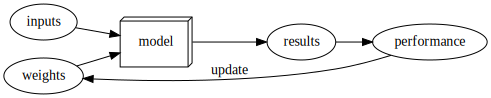

In [12]:
#hide_input
#caption Training a machine learning model
#id training_loop
#alt The basic training loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')